========================================================================================================================
# Getting started
In this section, we will cover:
* Importing the packages we need,
* Importing the data we will use,
* Checking the data in 2 different ways. 


In [1]:
%%capture                       # This just prevents the notebook from printing a bunch of boring stuff

# Needed to make the output of some cells cleaner and less confusing
!pip install -r reqs\requirements.txt | find /V "already satisfied"
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

# Needed for looking at the contents of folders and identifying files available to read in
import os

# Basic packackes for importing and working with data 
!pip install numpy
import numpy as np # linear algebra
!pip install pandas
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Needed for plotting and visualiasations
!pip install matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

!pip install seaborn
import seaborn as sns

# Needed for estimating best fit to common distributions
!pip install fitter
import fitter
from fitter import Fitter, get_common_distributions, get_distributions

# Needed for building a model of the existing dataset
!pip install -U scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression 

***
## Importing data
Next we need to import the data with which we are going to work. This is a pretty basic dataset that is often included with python distributions. 

Still, I wanted to demonstrate how you load your own dataset from a file. In this case, the file is located inside a folder called 'input' which is stored in the same place as my jupyter notebook (the .ipynb file that you clicked on to open this tab). 

Importing the file into the jupyter notebook also gives us a chance to name it, in this case `h_w_orginal`. 

A lot of demos name datasets things like `data` or `df` which is just short for 'data frame'. However, I find it helpful to give datasets more useful, descriptive names. 

In [4]:
print("The 'input' folder contains: " + str(os.listdir("input")))  
                                                        # This prints the contents of the "inputs" folder 
                                                        # as a quick check that we have something to import
    
h_w_original= pd.read_csv('input/weight-height.csv')    # read in the .csv as a variable called "h_w_original"
                                                        # You'll see a lot of tutorials that use names like "data" or "df".
                                                        # Doing so is easy, but bad practice. Useful names are much better.
                                                        # So start building good habits now!     

The 'input' folder contains: ['weight-height.csv']


***
## Checking the data
Let's quickly "sense check" the data we just imported. There are a few different ways to do that and I show you two here. 

### Check data method 1 - call by name
The first way is to simply type the name of the data into a cell and execute that cell. This gives you the first five and last five lines of the data and a summary of how many rows and columns. 

In [5]:
h_w_original                                            # check the new variable by simply calling its name.

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


### Check data method 2 - `.head(X)`

A second way to sense check the data is to call for the `head` of the file, which is the first X number of rows. Exactly how many rows are returned in the head of the file depends on the value of X you want. I use X=10 in the  example below. 

You should also note that the summary (how many rows and columns) is not provided at the end as it was in the first way to sense check. This doesn't matter much here for two reasons:
* You already know that information from the first sense check we ran.
* You can directly see that there are three columns because these three columns are easily seen on screen. 

This might matter more if you use `name.head(X)` as the first way to sense check the data or if you have too many columns in your data to fit on the screen. 

In [ ]:
h_w_original.head(10)                                  # calling "data_variable.head(X)" prints the first X rows in the data_variable


***
### Extra credit work
***

Try running the `head` function with a number other than 10 in the code cell below. You can also try running the `tail function`. You will need to edit the code below to get it to run correctly. 

In [ ]:
h_w_original.head(X)                                  # Try changing the value of X. 


# NOTE! This cell will produce an error if you try to run it as it was originally written. 
# What do you need to change to make it run correctly?

In [ ]:
h_w_original.tail(X)                                  # What do you think 'tail' will do? Try it out!

# NOTE! This cell will produce an error if you try to run it as it was originally written. 
# What do you need to change to make it run correctly?

===========================================================================================================================
# Exploring the data
In this section, we will cover:
* Multiple ways to get an overview, and
* How to visualise the data.

### Explore data method 1 - `.columns`
The first way to visualise the data is to have a look at the columns with a simple `name.columns` function. This tells you things like how many there are and what they are called. It is pretty basic but also pleasantly straightforward. 

In [ ]:
h_w_original.columns

### Explore data method 2  - `.info()`

Another option is to use `name.info()`. This returns lots more info (the clue is in the name) like what kind of an object the thing on which you called `info` is, how many entries it has, what their index range is, how many columns, what the column names are, whether there are missing values in those columns, what type of data each column is, how much memory is used, etc. 

In [ ]:
h_w_original.info()

Having used these overview options, we know:
* we have three columns (and we know the names),
* we have 1000 rows, 
* there are no missing values, and
* there are 2 different types (1 object and 2 floats). 

***
## Data descriptives

Now that we have a basic sense of what our data is (how big it is, what is in it, etc.) we need to have a look at its *contents*. As you might expect, there are a few ways to do this, each of which is slightly different. 

### Describe data method 1 - `describe()`
The first way is to use `name.describe()` which returns some basic descriptiove statistics for the numerical variables (not for 'gender' which is an object variable). In essence, this is the count, minimum, maximum, mean, etc. 

In [7]:
h_w_original.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


We know from the `.columns` function above that we have three variables, but we only see the descriptive statistics for `Height` and `Weight`. What happened to `Gender`?

Well, `Gender` is a non-numerical variable, and so is excluded from the basic `.describe()` function. We need another way to describe it.

### Describe data method 2 - `groupby("column_name").describe()`

If you want to get the same kind of big picture, descriptive statistics but for different subsets of the data instead of the whole thing, you can use the `groupby` function. 

For us, this is useful if we group the descriptive statistics by our non-numerical `Gender` variable. 

In [6]:
h_w_original.groupby("Gender").describe()

Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              Weight                                     \
              75%        max   count        mean        std         min   
Gender                                                                    
Female  65.563565  73.389586  5000.0  135.860093  19.022468   64.700127   
Male    70.988744  78.998742  5000.0  187.020621  19.781155  112.902939   

                                                        
               25%         50%         75%         max  
Gender                                                  
Female  122.934096  136.117583  148.810926  202.237214  
Male    173.887767  187.033546  200.357802  269.989699

### Describe data method 3 - `.value_counts()`

Another way to describe non-numerical variables like `Gender` is to use `.value_counts()`. 

In [10]:
h_w_original.Gender.value_counts()           # start with the name of the data, then `.`, then the name of the variable' then `.value_counts()`

Male      5000
Female    5000
Name: Gender, dtype: int64

The `value_counts` function is a useful way to see how many of each value we have for the specified variable. For the case of gender, we have an even distribution between 'Female' and 'Male'. Not surprising, although we may see more 'Non-binary', 'Third gender', or 'Other' in the future. 

***
### Extra credit work
***


Why don't you try running the `value_counts()` function out on one of the other variables,like 'Height' or 'Weight'? You can do that in the code cell below, but you will need to edit the code before running it to get it to run correctly. 

In [ ]:
h_w_original.variable_name.value_counts()               # Try counting the values of other fields. Are they all unique?

# NOTE! This cell will produce an error if you try to run it as it is now. What do you need to do to make it run correctly?

 You may find that trying the `value_count` function on 'Height' or 'Weight' was not as useful as it was for 'Gender'.
 
 This is because, as a field with potentially infitine values, none are repeated. It is useful to remember that the type and expected values of a column are useful when thinking about what descriptives you might want to run. 

***
## Visualizations

Descriptive statistics are super useful, but sometimes you just want to *look at the data* to get a better understanding. 
That is where visualizations come in!

### Visualisation method 1  - simple scatterplot

A classic way to visualise a relationship between two continuous variables is to get a scatterplot. A nice, simple, straightforward scatterplot! 

<AxesSubplot: xlabel='Height', ylabel='Weight'>

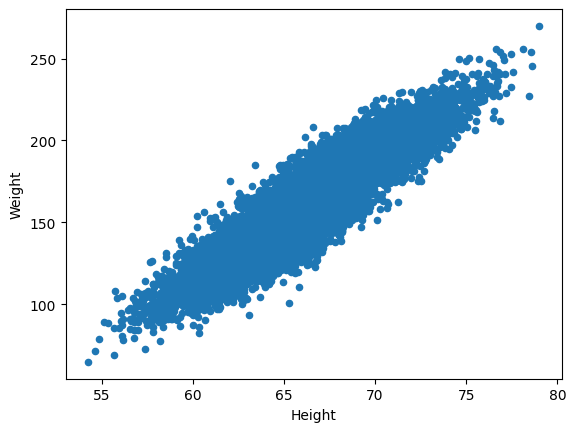

In [11]:
h_w_original.plot.scatter(x = 'Height', y = 'Weight')         # a basic scatter plot of height and weight using matplotlib

### Visualisation method 2  - scatterplot with colour

However, we have **3** variables, not just two, so lets modify oun simple scatterplot to colour each plotted point by 'Gender'. 

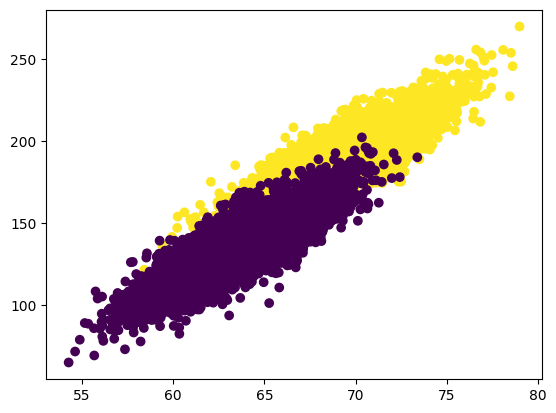

In [12]:
plt.scatter(x = h_w_original.Height,y = h_w_original.Weight, 
            c = pd.Categorical(h_w_original.Gender).codes)       # a scatter plot of height X weight using matplotlib
                                                                 # this time colour coded by gender

This is great for preliminary "getting a sense of what is in the data" sort of work, but there are lots of things we could add that would make the plot better if we were to publish it somewhere. For example, we could:
* change the size if we wanted it to be clearer
* change the colours to be colour-blind friendly
* add titles and axis labels
* add legends so we know what the colours refer to
* add one or more lines of best fit to clarify the trends in the data


These are all things you can add to plots to be fancy. I won't show you how here, I just wanted you to know it can be done.

The visualisations show:
* clear correlation between height and weight
* clear differences between the two genders

There may even be different correlations between height and weight for each gender? It is hard to say from these preliminary visualisations, but these kind of patterns have some implications for our synthetic data. So let's look at the distributions!

***
### Extra credit work
***

The visualisations above use `matplotlib`, which is a very common package. Another package that we imported is `seaborn` and when we imported this package we gave it the nickname of `sns`. You can see this nickname in the next two code cells because we type `sns.scatterplot` to run the scatterplot function in `sns`. 

You don't necessarily need to know how to make scatterplots (or any kind of plot) in more than one package, but it may be useful to see examples. In this way, you can get used to the way each one works, how the arguments must be listed, what else is printed along with the visualisation, etc. 

For example, in the cell below to create the basic scatterplot in `sns`, the data to use is specified only by including `data = h_w_original` as the first argument (the first thing inside the `( )` after the function name). Note that there are spaces before and after the `=`. 

<AxesSubplot: xlabel='Height', ylabel='Weight'>

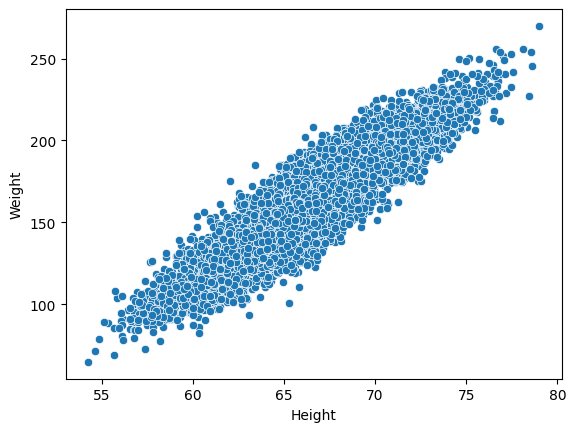

In [13]:
sns.scatterplot(data = h_w_original, x = "Height", y = "Weight")

The next cell creates the colour-coded-by-gender scatterplot in `sns` and in this one you see the first argument is written as `data=h_w_original` with no spaces before or after the `=`. 

In [ ]:
sns.scatterplot(data=h_w_original, x="Height", y="Weight", hue="Gender")

So, the spaces before and after the `=` are optional. What else is optional? Is the order of the arguments fixed or can they be re-organised? Try editing the code in the next cell to see what happens if you put `X`, `Y`, or `hue` first. 

In [ ]:
sns.scatterplot(data=h_w_original, x="Height", y="Weight", hue="Gender")

===========================================================================================================================
## Distributions

In this section we cover:
* how to create histograms to see distributions, 
* how to find the best fit distribution from sets of common distributions. 

The correlations we saw in the scatterplots suggest we ought to look at distributions for each variable. We don't need to see the distributions for Gender, since we know there are exactly 500 of each. 

Let's start with looking at Height, using 30 bins. 

### Distribution - height into 30 bins

In [ ]:
plt.hist(h_w_original.Height, bins=30)


This is probably about what you might expect. Not so many super short or super tall people with most people in the middle and a clear "bell-shaped" distribution. 

***
### Extra credit work
***

But does the number of bins matter? Have a play around here by changing the value of X in the next cel to see what the height histogram looks like with 5 bins, or 60 bins, or however many bins you like. 

In [ ]:
plt.hist(h_w_original.Height, bins=X)
# NOTE! This cell will produce an error if you try to run it as it is now. What do you need to do to make it run correctly?

### Distribution - weight into 30 bins

Now, what about weight? Let's do a basic histogram with 30 bins. 

(array([  3.,   3.,   9.,  35.,  83., 160., 279., 409., 553., 682., 763.,
        730., 641., 591., 617., 610., 693., 713., 665., 599., 483., 310.,
        182., 106.,  43.,  22.,   6.,   9.,   0.,   1.]),
 array([ 64.70012671,  71.54311244,  78.38609817,  85.22908389,
         92.07206962,  98.91505534, 105.75804107, 112.6010268 ,
        119.44401252, 126.28699825, 133.12998398, 139.9729697 ,
        146.81595543, 153.65894116, 160.50192688, 167.34491261,
        174.18789834, 181.03088406, 187.87386979, 194.71685551,
        201.55984124, 208.40282697, 215.24581269, 222.08879842,
        228.93178415, 235.77476987, 242.6177556 , 249.46074133,
        256.30372705, 263.14671278, 269.98969851]),
 <BarContainer object of 30 artists>)

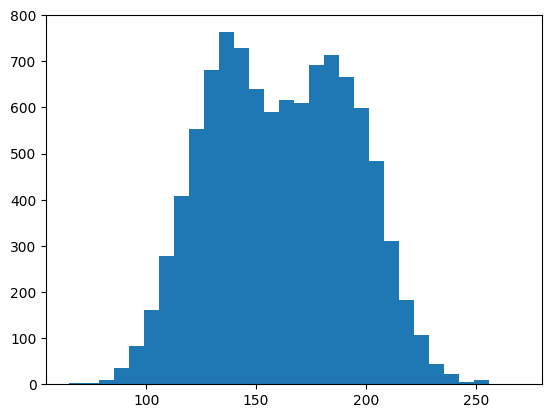

In [14]:
plt.hist(h_w_original.Weight, bins=30)


Uh oh. This is no longer so clear cut. Instead, it looks like weight is creating a bimodal distribution. Almost certainly, this relates to the differences between males and females. Let's dive in deeper. 

### Distribution - height 

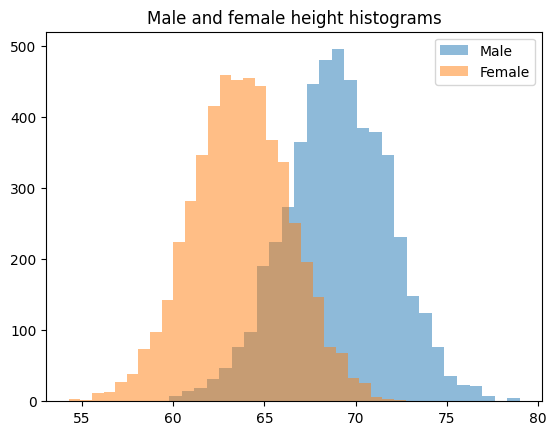

In [18]:
h_w_males = h_w_original[h_w_original['Gender']=='Male']        # Creates a subset of only the rows where gender = male
h_w_females = h_w_original[h_w_original['Gender']=='Female']    # And another with only the rows where gender = female


plt.hist(h_w_males['Height'],                                   # Creating a historgam of the male-only dataset
         alpha=0.5,                                             # that will appear at 50% transaparency, 
         label='Male',                                          # and that has a 'Male' label in the legend,
         bins = 30)                                             # and still with 30 bins. 

plt.hist(h_w_females['Height'],                                 # Repeat for the female-only dataset.
         alpha=0.5,                        
         label='Female',
         bins = 30)

plt.legend(loc='upper right')                                   # This tells matplotlib where to put the legend.
plt.title('Male and female height histograms')                  # And gives a title for good measure.
plt.show()                                                      # Finally, the command to show the plot. 
                                                                # Previously, this extra command was not needed. 
                                                                # But the extra layers of data need more clarity. 

Useful! We can clearly see that, despite our earlier bell-shaped histogram for height, gender does matter and we actually have a bimodal distribution, with each being roughly bell-shaped. 

What about weight? We already have subsets of male and female-only data, so lets just plot those onto a histogram of weight. 

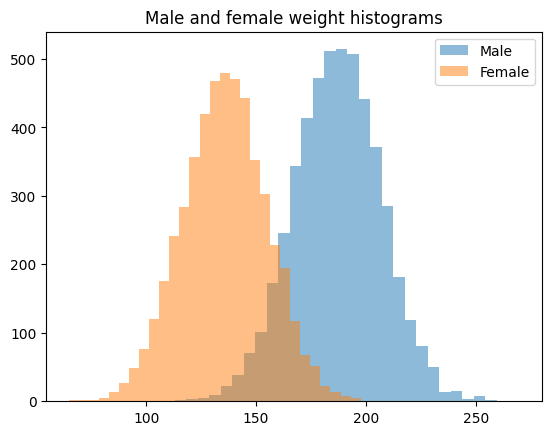

In [19]:
plt.hist(h_w_males['Weight'],                    # Creating a historgam of the male-only dataset
         alpha=0.5,                              # that will appear at 50% transaparency, 
         label='Male',                           # and that has a 'Male' label in the legend, 
         bins = 30)                              # and 30 bins again. 

plt.hist(h_w_females['Weight'],                  # Repeat for the female-only dataset.
         alpha=0.5,                        
         label='Female', 
         bins = 30)

plt.legend(loc='upper right')                    # This tells matplotlib where to put the legend.
plt.title('Male and female weight histograms')   # And gives a title for good measure.
plt.show()                                       # Finally, the command to show the plot. 
                                                 # Previously, this extra command was not needed. 
                                                 # But all the extra layers of date make this plot more complicated. 

Again, it is clear that weight is roughly bell-shaped, but clearly bimodal by gender. 

But "bell-shaped" is not really specific, is it? Let's see what distribution is the best fit for our data. For this, we use the `fitter` package that we installed earlier. Let's start by getting a list of the 10 most common distributions. 
              

In [ ]:
get_common_distributions()

Let's compare the males height distribution to these common distributions to see which is the closest match. 

First, for each distribution of interest (male height, male weight, female height, and female weight) we create a `Fitter` object that takes two variables - the data to fit and the distributions against which that data should be fit. 

For the ease of working with these four `Fitter` variables, I popped them all into a list. 

In [21]:
h_males = Fitter(h_w_males.Height, distributions= get_common_distributions())
w_males = Fitter(h_w_males.Weight, distributions= get_common_distributions())
h_females = Fitter(h_w_females.Height, distributions= get_common_distributions())
w_females = Fitter(h_w_females.Weight, distributions= get_common_distributions())

distribution_list = [h_males, w_males, h_females, w_females]

Next, I create an empty list called `best_fit_distribution` and then run a `for` loop on the list I just created with the 4 `Fitter` objects. This for loop:
* identifies the fits listed within that `Fitter` object, 
* finds which of those fits best (according to the least sum of squares method - other methods are available) 
* and appends the best fit identified to the previously created empty list. 

Then I print the list. 

In [22]:
best_fit_distribution = []                # this is an empty list that I will use to hold the output of the for loop

for distribution in distribution_list:    # the for loop looks at each fitter item in the list in turn 
    distribution.fit()                    # finds the distribution of the data in the fitter object, 
    best = distribution.get_best(method = 'sumsquare_error')  # finds the common distributions that best matchs the data distribution
    best_fit_distribution.append(best)    # and writes the best fitting distribution into the list

best_fit_distribution                     # then prints the list after the for loop has finished running on all the fitter objects

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.20it/s]


[{'norm': {'loc': 69.02634590621741, 'scale': 2.863075878119538}},
 {'norm': {'loc': 187.0206206581932, 'scale': 19.779176302396458}},
 {'gamma': {'a': 12899.326046528327,
   'loc': -242.5469882636324,
   'scale': 0.023741959815273564}},
 {'norm': {'loc': 135.86009300746835, 'scale': 19.020565463416645}}]

This shows that for most of the variables, the best fit is a 'normal' distribution. That's great! We can use that!

I will use 'normal' for all four because this is a simplistic demonstration. But for extra credit you can try using  'gamma' for only the female height variable to see how that goes. 


=========================================================================================================================
# Creating synthetic data 

Now that we have reasonable idea of what our data *looks like* we can get started making synthetic versions of it. 
In this section, we will cover:
* how to make low fidelity data, 
* multiple ways to create each syntheized variable, 
* how to quickly and easily make low fidelity data that is "reasonably" useful.


***
## Low fidelity

Remember that **low fidelity** data does not look very much like the real data. The way I have set it up here, low fidelity data works a bit like drawing a box and then filling that box randomly. In this section, we create three different levels of low-fidelity synthetic data, each of which has increasingly sophisticated or realistic "boxes" which are then filled in randomly. 
* The **lowest** fidelity version is essentially one big box that has no sensible dimensions, after which it is filled with random numbers for all three variables. 
* The **lowish** fidelity version is a box that has sized more sensibly because we clarify the minimum and maximum values from which the random numbers should be drawn, after which all three variables are still filled randomly. 
* The **low** fidelity version is a much more sensible box because the size is determined by the minimum and maximum values of the data, one column (`Gender`) is filled with 'Male' and 'Female' (instead of numbers) with an even 50-50 distribution, and the other variables are filled more or less randomly.  

***

### Low fidelity option 1 - lowest fidelity

Let's start with the lowest fidelity version. To do this, we:
* create a `pandas` data frame (when we imported pandas,  we assigned it the nickname `pd` to make running `pandas` commands a bit faster) and assign it the name `lowest_fidelity`, 
* Within that data frame, we create 3 random `numpy` arrays (`numpy` is also imported with the nickname `np` to make it faster). Each of these arrays is 100 digits long, and
* we assign the names 'Gender', 'Height' and 'Weight' to the three columns made out of random number arrays. 

After creating it, we inspect the new data frame by calling its name. 

In [ ]:
lowest_fidelity = pd.DataFrame(np.random.randn(100, 3),               # Create a data frame from 3 random, 100 digit arrays
                               columns=('Gender','Height', 'Weight')) # and then name the columns. 
lowest_fidelity                                                       # Inspect quickly!

Having inspected the data frame, we can see that it is clearly a lot of nonsense. A negative weight or height is impossible. Further, there are a lot of digits after the decimal point which seems like unecessary precision for this kind of task. 

It also helps to see a scatterplot. We use the same basic code as before, but this time making sure to refer to the newly created `lowest_fidelity` data frame instead of the real data that we had imported. Note that there are many different colours because `lowest_fidelity.Gender` is numerical rather than categorical. 


In [ ]:
plt.scatter(lowest_fidelity.Height,
            lowest_fidelity.Weight, 
            c = pd.Categorical(lowest_fidelity.Gender).codes)

Good practice demands that we check to be sure our synthetic data has not accidentally recreated any rows that match the original data. So let's run a quick check!

In [ ]:
lowest_fidelity.equals(h_w_original)        # The 'equals' function compares 2 data frames.
                                            # If any rows match, it will return 'True' otherwise it will return 'False'

***
### Extra credit work
***

Try modifying and running the code cell below to create another data frame from random numbers. But this time, you choose how big it will be (how many rows and columns) and what the columns will be called. 

You will need to edit the code below to make it run correctly. Replace ‘NumberofRows' and ‘NumberOfColumns’ with how many rows and columns you want. Add and/or edit the column names to match teh number of columns you want. 

In [ ]:
extra_credit_very_random = pd.DataFrame(np.random.randn(NumberOfRows, NumberOfColumns), 
                                        columns=('ColumnName1','ColumnName2', 'ColumnName3'))
extra_credit_very_random
                                                 
                                # NOTE! This cell will produce an error if you try to run it as it was originally written. 
                                # What do you need to change to make it run correctly?

***

### Low fidelity option 2 - lowish fidelity

Now, let's move on to a low-but-not-quite-as-low fidelity version - the one with a more sensibly sized box. 
To do this, we:
* create another `pandas` data frame (named `lowish_fidelity`) in a very similar way, 
* still with 3 random `numpy` arrays that are 100 digits long but this time with a range of 10 to 100 specified), and
* still assigned the column names 'Gender', 'Height' and 'Weight'. 

After creating it, we inspect the new data frame by calling its name. 

In [ ]:
lowish_fidelity = pd.DataFrame(np.random.randint(10,100,size=(100, 3)),    # Another dataframe made of 3 100-digit arrays
                               columns=('Gender','Height', 'Weight'))     # and named columns. 
lowish_fidelity                                                           # Another quick inspection. 

If you look closely at the code for the `lowest_fidelity` and `lowish_fidelity` data frames, you see the only difference is in the line with the `numpy` arrays. 

The first data frame has `np.random.randn(100, 3)` while the second has `np.random.randint(10,100,size=(100, 3)`. 

The key differences are:
* the first has `randn` in front of the parentheses while the second has `randint`. This is what switches from numbers (with so many precise digits after the decimal point) to integers (with no decimal points). 
* the second has `10,100` at the begining of the parentheses. This is what sets the range from which the random integers should be drawn, meaning we have nobody with a zero or negative height or weight. 

Again, let's create a quick scatterplot to see how it looks. 

There are still problems (like how gender is a random integer between 10 and 100) but at least none of the values are negative!

In [ ]:
plt.scatter(lowish_fidelity.Height,
            lowish_fidelity.Weight, 
            c = pd.Categorical(lowish_fidelity.Gender).codes)

Let's just run that check to be sure we still don't have any matches between the synthetic and original. 

In [ ]:
lowish_fidelity.equals(h_w_original)        

This is still *pretty* poor fidelity as all the data are still drawn randomly. However, at least we are getting  better by making a less silly box!

***
### Extra credit work
***

Try modifying and running the code cell below to create another data frame from random integers, but this time set the ranges in a place of your choosing. . You will need to edit the code below to make it run correctly. 

In [ ]:
Extra_credit_less_random = pd.DataFrame(np.random.randint(MinimumOfYourChoice,MaximumOfYourChoice,size=(100, 3)), 
                               columns=('Gender','Height', 'Weight'))
Extra_credit_less_random

                                # NOTE! This cell will produce an error if you try to run it as it was originally written. 
                                # What do you need to change to make it run correctly?

***

### Low fidelity option 3 - low fidelity

Now, let's move on to the least-low fidelity version - the one where we pay a some attention to the actual data we explored in order to draw the box. To do this, we:
* create another `pandas` data frame (named `low_fidelity_h_w`), 
* but now with only two columns of 100 random values for the height and weight, which are drawn from a uniform distribution within the min and max found in our earlier data exploration, 
* one column of 50 'Male and 50 'Female', 
* still assigned the column names 'Gender', 'Height' and 'Weight', but this time assigning the column names as the columns are created to make sure they match the column contents (e.g. the `Height` column is created with the min and max for height rather than weight, etc.). 

After creating it, we inspect the new data frame by calling its name. 

In [ ]:
low_fidelity_preliminary_step = {"Height": np.random.uniform(low=54, high=78, size=(100,)),  # First, make a dictionary 
                                 "Weight": np.random.uniform(low=64, high=269, size=(100,)), # from more relevant "random"
                                 "Gender": (['Male'] * 50) + (['Female'] * 50)}              # data.
low_fidelity = pd.DataFrame(low_fidelity_preliminary_step)                                   # Then make it a data frame
low_fidelity                                                                                 # and have a look at it.

Again, we have a quick look at a scatterplot for our data. Since it is much less random (due to the sensible min and max values we set and the categorical values for Gender) it looks much better. It still does not have the right distributions or correlations between min and max, but we are getting closer. 

In [ ]:
plt.scatter(low_fidelity.Height,
            low_fidelity.Weight, 
            c = pd.Categorical(low_fidelity.Gender).codes)

Aaaaaand the check to be sure we have not recreated any rows of the original in our synthetic version. 

In [ ]:
low_fidelity.equals(h_w_original)     

========================================================================================================================

In this section, we will cover:
* How to make medium fidelity data is several ways, 
* How to synthesize the target data set in useful ways that are still relatively fast and easy, 
* How to create data subsets and blend them together to synthesize complex data sets. 

## Mid-fidelity data

Now that we understand how to make low-fidelity synthetic data, we need to understand how to make medium-fidelity data. Instead of working from the outside in (by drawing boxes and filling them with mostly random data), medium-fidelity data works by building from the inside out (by creating simplistic models of the real data and then building it to generate synthetic data). Again, there are three level of increasing fidelity presented here: 
* medium_fidelity_1 makes a very simplistic regression model of the data and then uses the mean and standard deviation of height from the real data to generate matching synthetic data points. 
* medium_fidelity_2 works much like medium-fidelity-1 but adds in some noise so that the generated data does not quite so obviously match the regression model made from the original
* medium_fidelity_3 separates the data into male and female subsets, makes a regression model of each, and uses those (plus much more noise) to generate a combined synthetic data set that is better than the others (although still quite unrealistic looking). 

***

### Mid fidelity option 1 - medium_fidelity_1
Roll on  medium-fidelity-1! To make regression models we need to convert the text strings in our categorical data ('male' and 'female') into numbers.  It is often a helpful step to make a copy to work on rather than make fundamental changes to our original data. Let's start by coping and then recoding the `Gender` column. 

In [ ]:
h_w_numerical = h_w_original                                # Create a copy of our original data
h_w_numerical['Gender'].replace('Male',0, inplace=True)     # and convert the categorical variables to numerical by
h_w_numerical['Gender'].replace('Female',1, inplace=True)   # replacing the 'male' and 'female' strings to '0' and '1'

h_w_numerical                                               # Have a quick look to make sure it worked the way you wanted.

Next, we find the mean and standard deviation of height from our real data, convert the gender and height (independent variables) and weight (dependent variable) into arrays and make a linear regression model from those arrays. 

For good measure, we can inspect how well our linear regression model scores. 

In [ ]:
h_mean = h_w_numerical["Height"].mean()                   # Save the mean and standard deviation for height
h_std = h_w_numerical["Height"].std()                     # from the numerically transformed data.

height_array = h_w_numerical.iloc[:, :-1].values           # Convert Gender and Height columns into one array
weight_array = h_w_numerical.iloc[:, 2].values             # and the Weight column into another array. 

model = LinearRegression().fit(height_array, weight_array) # Make a linear regression model from the two arrays. 

model.score(height_array, weight_array)                    # Have a look at the regression model, which in this case
                                                           # is just a number capturing the relationships. 

Now, we want to start generating a synthetic data set. We start by making something very like the best fidelity version of our low fidelity data sets, by creating a data frame that has an appropriately named `Gender` column with 50 'Male' and 50 'Female'. 

However, instead of filling the `Height` column via a randomly drawn uniform distribution with the mix and max of our real data ("from the outside in"), this version uses a normal distribution generated from the mean and standard deviation of height from our real data ("from the inside out").

Importantly, we also create a `Weight` column but fill it with null values. These will be filled in by the regression model later. 

In [ ]:
medium_fidelity_1 = {"Gender": ([0] * 50) + ([1] * 50),            # Create another dictionary that is now much less random
                "Height": np.random.normal(h_mean, h_std, 100),    # with gender (in numerical format) and height created 
                "Weight":('null')}                                 # from a random distribution around the real mean and 
                                                                   # standard deviation. 
medium_fidelity_1 = pd.DataFrame(medium_fidelity_1)                # Convert that dictionary to a data frame
medium_fidelity_1                                                  # And have a look!

Now is when we create the extra step that uses our linear regression model (with the `Gender` and `Height` values as input) to predict the value of the `Weight` (as output). 

In [ ]:
for ind in medium_fidelity_1.index:                                         # Now, iterate over the index items one by one,
    current_pred = model.predict([[medium_fidelity_1['Gender'][ind],        # creating a temporary variable to hold the 
                                   medium_fidelity_1['Height'][ind]]])      # weight that the linear regression model predicts
    medium_fidelity_1['Weight'][ind] = (current_pred[0])                    # when given the height and gender as input.
                                                                       # Overwrite the Weight for the same index item 
                                                                       # with the temporary varible. Repeat until done

medium_fidelity_1                                                           # Check the weight has been overwritten correctly. 

As an extra sense check, we can create a quick scatterplot of our medium_fidelity_1 synthetic data, followed by the comparison check. 

In [ ]:
plt.scatter(medium_fidelity_1.Height, 
            medium_fidelity_1.Weight, 
            c = pd.Categorical(medium_fidelity_1.Gender).codes)

In [ ]:
medium_fidelity_1.equals(h_w_original)     

Clearly, it captures something about our real data (the distinction between genders and the height-weight relationship) but it is **very** linear and thus not very realistic. 

***
### Mid fidelity option 2 - medium_fidelity_2

So let's move on to `medium_fidelity_2`, which is created in a very similar way to `medium_fidelity_1`. However, there is some added noise to make it less obviously linear (and therefore maybe a bit more realistic). This added noise comes in two parts. 

First, we the generated dataframe in the same way as medium_fidelity_1, with a `Gender` column that has 50 'male' and 50 'female' entries and a `Height` column created with random numbers generated by a normal distribution around the mean and standard deviation of our real data. However, this generated dataframe has an additional column called `Noise` which we fill with random numbers generated around a mean of 0 and with a standard deviation of 10. 

Second, when we iterate over the generated data, using our linear regression model to turn the gender and height (input) into a predicted weight (output) to which we add the value of the noise column. Since the noise can be positive or negative and relatively large or small, the weight (output) is noisier. 

In [ ]:
medium_fidelity_2 = {"Gender": ([0] * 50) + ([1] * 50),           # Repeate the same starting steps again, 
                "Height": np.random.normal(h_mean, h_std, 100),   # but saving it in a new dictionary that has "noise"
                "Weight":('null'),                                # in the name and adding a column to hold the noise
                "Noise": np.random.normal(0, 10, 100)}            # that contains some random normal values around 0.   
 
medium_fidelity_2 = pd.DataFrame(medium_fidelity_2)               # Convert the "noise" dictionary to a data frame

for ind in medium_fidelity_2.index:                                         # Iterate over the generated dataframe
    current_pred = model.predict([[medium_fidelity_2['Gender'][ind],        # but with an added step of adding the noise
                                   medium_fidelity_2['Height'][ind]]])      # value to the temp variable,
    current_pred = current_pred + medium_fidelity_2['Noise'][ind]           # before overwriting the Weight value
    medium_fidelity_2['Weight'][ind] = (current_pred[0])                     

medium_fidelity_2                                                 # Check it quickly. 


And, just to give ourselves a visual interpretation of the changes, let's quickly make a scatterplot before comparing to the original. 

In [ ]:
plt.scatter(medium_fidelity_2.Height, 
            medium_fidelity_2.Weight, 
            c = pd.Categorical(medium_fidelity_2.Gender).codes)

In [ ]:
medium_fidelity_2.equals(h_w_original)     

Already, this is looking much better. We have preserved the distinction between the genders and the height-weight relationship, but the synthetic data is much more cloudlike and much less linear. Maybe this is good enough to use as is, depending on what you want to use the synthetic data for. But it could be a bit better. 

***
### Mid fidelity option 1 - medium_fidelity_3

The third version of medium fidelity data works the same basic way as the first and second, but with the added complexity of splitting the data into male and female versions, finding the male and female height means and standard deviations, creating male and female linear regression models, using those models (plus noise) to generate synthetic datasets and then smooshing those datasets together again. 

Yes, smooshing datasets together is the technical term. 

So, let's begin by running through all the basic steps for the male-only data subset. 

In [23]:
males_numerical = h_w_males                                # Copy the male-only data subset we used back in visualisatons
males_numerical['Gender'].replace('Male',0, inplace=True)  # and convert the categorical variable strings to numerical.

m_h_mean = males_numerical["Height"].mean()                # Save the male-only mean and standard deviation for height
m_h_std = males_numerical["Height"].std()                   
m_h_min = males_numerical["Height"].min()                  # Also save the male-only minimum height and weight for 
m_w_min = males_numerical["Weight"].min()                  # a later sense check

m_h_array = males_numerical.iloc[:, :-1].values            # Convert the Gender and Height columns into one array
m_w_array = males_numerical.iloc[:, 2].values              # and then the Weight column into another array. 


males_model = LinearRegression().fit(m_h_array, m_w_array) # Make a linear regression model from the male arrays. 

med_fidelity_m_noise = {"Gender": ([0] * 60),                      # We create another dictionary. Again, a useful name.
                "Height": np.random.normal(m_h_mean, m_h_std, 60), # fill height with normal distribution around      
                "Weight":('null')}                                 # male-only mean and standard deviation. 
 
med_fidelity_m_noise = pd.DataFrame(med_fidelity_m_noise)            # Convert the dictionary to a data frame

#med_fidelity_m_noise                                               # You need to remove the '#' at the start of this line
                                                                     # if you want to check it.

Then we run through the iterated model-predicting, noise-adding steps for the male-only data. In this version, though, we do not add a single `Noise` column to the generated dataset but instead add it in twice to both the height and weight. 
* Noise is added to (and subtracted from, technically) the height *before* any predictions are made (the noisidied height is written over the original height) and
* Noise is added to (and also subtracted from) the weight *after* the prediction is made but before it is written into the generated dataset. 

Since the noise can be either positive or negative, adding one randomly generated noise value to and then subtracting a different randomly generated noise value from the height and again from the weight means that both values might be clearly higher or lower than they would otherwise be, but might also be about the same as they would otherwise be. As these steps are sequentially and take place at different times but in the same basic way, they offer a way to add noise that preserves the same basic process but complicates the linear relationship. 

In [24]:
for ind in med_fidelity_m_noise.index:                                    # We still iterate over the newly created data
    temp_height = (med_fidelity_m_noise['Height'][ind] +                  # but we add a step that copies the height, then
                   np.random.normal(0, 15, 1) -                           # adds a random number (0 mean, 1 standard dev),
                   np.random.normal(0, 15, 1))                            # then subtracts another random number, then
    if temp_height < m_h_min:                                             # a quick check to add some height back to 
        too_short = m_h_min - temp_height                                 # any rows that are below the minimum of the original
        temp_height = temp_height + too_short + np.absolute(np.random.normal(0, 4, 1))

    med_fidelity_m_noise['Height'][ind] = temp_height                     # before overwriting the height with the added noise. 
    current_pred = males_model.predict(
        [[med_fidelity_m_noise['Gender'][ind],                            # We create a weight prediction based on gender
          med_fidelity_m_noise['Height'][ind]]])                          # and the newly noisified height
    current_pred = (current_pred +                                        # Then we take the predicted weight and add
                    np.random.normal(0, 15, 1) -                          # another random number (again, 0 mean, 1 std)
                    np.random.normal(0, 15, 1))                           # then subtract another random number
    if current_pred < m_w_min:                                           # A quick check to add some weight to any rows
        too_light = m_w_min - current_pred                               # that are below the minimum of the original
        current_pred = current_pred + too_light + np.random.normal(0, 2, 1)
    med_fidelity_m_noise['Weight'][ind] = (current_pred[0])              # before overwriting with the new, noisy weight value
                    
#med_fidelity_m_noise                                                      # Check weight has been overwritten.

Next, run through the basic steps for the female-only data. 

In [25]:
females_numerical = h_w_females                                      # Copy data
females_numerical['Gender'].replace('Female',1, inplace=True)        # Replace strings with numbers.

f_h_mean = females_numerical["Height"].mean()                        # Find and save the female-only height mean and 
f_h_std = females_numerical["Height"].std()                          # standard deviation.
f_h_min = females_numerical["Height"].min()                          # Also save the female-only minimum height and weight for 
f_w_min = females_numerical["Weight"].min()                          # a later sense check

f_h_array = females_numerical.iloc[:, :-1].values                    # Create a gender-height (input) array
f_w_array = females_numerical.iloc[:, 2].values                      # and a weight (output) array. 

females_model = LinearRegression().fit(f_h_array, f_w_array)         # Turn female-only arrays into female-only model.  

med_fidelity_f_noise = {"Gender": ([1] * 60),                        # Start generating a female-only synthetic dataset
                "Height": np.random.normal(f_h_mean, f_h_std, 60),   # making sure to use the female-only mean and std. 
                "Weight":('null')}                                    
 
med_fidelity_f_noise = pd.DataFrame(med_fidelity_f_noise)            # Convert dictionary to data frame.
# med_fidelity_f_noise                                               # Check it if you want to.

And, as before, we run through the same synthetic data generation, model-prediction with multi-stage noise added steps applied to the female-only dataset. 

In [26]:
for ind in med_fidelity_f_noise.index:                               # We still iterate over the newly created data
    temp_height = (med_fidelity_f_noise['Height'][ind] +             # but we add a step that copies the height, then
                   np.random.normal(0, 15, 1) -                      # adds a random number (0 mean, 1 standard dev),
                   np.random.normal(0, 15, 1))                       # then subtracts another random number, then    
    if temp_height < f_h_min:                                        # A quick check to add some height back to 
        too_short = f_h_min - temp_height                            # any rows that are below the minimum of the original
        temp_height = temp_height + too_short + np.absolute(np.random.normal(0, 3, 1))
    med_fidelity_f_noise['Height'][ind] = temp_height                # overwrites the height with the added noise. 

    current_pred = females_model.predict(
        [[med_fidelity_f_noise['Gender'][ind],                       # We create a weight prediction based on gender
          med_fidelity_f_noise['Height'][ind]]])                     # and the newly noisified height
    current_pred = (current_pred +                                   # Then we take the predicted weight and add
                    np.random.normal(0, 15, 1) -                     # another random number (again, 0 mean, 1 std)
                    np.random.normal(0, 15, 1))                      # then subtract another random number,
    if current_pred < f_w_min:                                      # A quick check to add some weight to any rows
        too_light = f_w_min - current_pred                          # that are below the minimum of the original
        current_pred = current_pred + too_light + np.random.normal(0, 2, 1)

    med_fidelity_f_noise['Weight'][ind] = (current_pred[0])          # before overwriting the Weight value with our 
                                                                     # newly noisified weight. 
                    
# med_fidelity_f_noise                                                 # Check weight has been overwritten.

Having generated two gender-specific models (each with noise added in more complicated ways), we need to join the datasets by concatenating the dataframes. 

Then we need to make a scatterplot to have a look at it. 

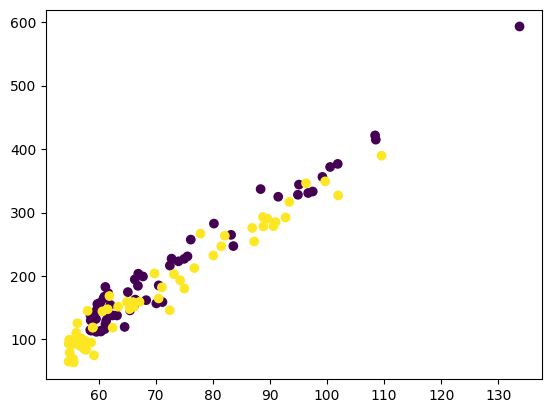

In [27]:
medium_fidelity_3 = pd.concat(                                      # Create the final dataset using the `concat` function
    [med_fidelity_m_noise,                                          # on a list containing both datasets to concatenate
     med_fidelity_f_noise], 
    ignore_index=True)                                              # making sure to tell it to ignore the indeces. 

plt.scatter(medium_fidelity_3.Height,                               # Make a scatterplot to check it!
            medium_fidelity_3.Weight,
            c = pd.Categorical(medium_fidelity_3.Gender).codes)

In creating this last synthetic version, we converted the categorical gender from the original to numberical. Thus, if we compare our synthetic output directly to the original, we won't find any matches even if a height and weight were recreated exactly. Thus, 

we need to compare our synthetic output to the original after it was converted to numerical. We could either smoosh the converted versions 

In [ ]:
print(medium_fidelity_3.equals(males_numerical))
print(medium_fidelity_3.equals(females_numerical))

Interestingly, this version is not as cloudlike as `medium_fidelity_2`. This is because in `medium_fidelity_2` the output alone is pushed away from the regression line. But in `medium_fidelity_3` the height and weight are both noisified but in a way that means they may not actually be pushed away from the regression line. 

What is preserved here though is that the two genders have similar regression lines but very different means and standard deviations. Making the data more cloudlike is one way to increase the fidelity of the synthetic data, but preserving the different features of subset of that data is another. 

***

### Extra credit work

***

Can you repeat this last step using a 'gamma' distribution for female height instead of a 'normal' distribution? What effect does this have?

reflect on the whole process. What did you like or not like about these different ways to create synthetic data? What purposes d Would you use any of the methods as they are? Would you make minor edits? Would you make major edits? What do you think high-fidelity synthetic data would look like? 

## Documentation

A final consideration - all good datasets require some metadata documentation. This should tell people who want to use the data who created the data, what kind of data it is, how it was created, and any special details that are important to know. 

For this synthetic dataset, we would need to make clear that it is synthetic, that it is based on a real data set, and we should cite the original (ideally with a DOI but certainly with a study name, number, etc. ) 

We would need to describe how we created the synthetic version, with explanations of : 
* what we kept the same (like the variable names, how many categories are in the categorical variables, etc. ),
* what changes we made any changes (like changing `Male` to `0` and `Female` to `1`), 
* the original features used to make it (like the mean, minimum, distributions, etc. )
* why we made it the size that we did,
* how much noise we added (and what kind), and
* anything else that is relevant.

You might even, if it is reasonable to do so, include the code that you used to create the synthetic version directly in the documentation. If this is not possible, then you could certainly lodge the code you used in a GitHub repo, create a DOI for that repo, and then city that DOI in your documentation!
